In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
subway = pd.read_csv("C:/Users/심은조/Downloads/subway.csv", encoding='cp949')

In [3]:
subway_oct2 = subway[(subway['수송일자'] == "2022-10-15") | (subway['수송일자'] == "2022-10-14") | (subway['수송일자'] == "2022-10-16") | (subway['수송일자'] == "2022-10-08") | (subway['수송일자'] == "2022-10-22")]

In [4]:
subway_oct2

,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후
340122,340123,2022-10-08,1,150,서울역,승차,일반,227,224,514,...,2822,3222,3591,3016,2474,1997,2232,1681,792,14
340123,340124,2022-10-08,1,150,서울역,승차,어린이,0,0,4,...,40,68,68,43,37,21,26,10,1,0
340124,340125,2022-10-08,1,150,서울역,승차,중고생,0,0,1,...,0,2,0,1,0,0,0,1,0,0
340125,340126,2022-10-08,1,150,서울역,승차,청소년,1,1,14,...,63,64,68,69,63,47,69,49,16,0
340126,340127,2022-10-08,1,150,서울역,승차,우대권,122,89,207,...,622,673,581,413,361,259,232,118,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394483,394484,2022-10-22,8,2828,남위례,하차,일반,5,54,65,...,231,275,264,314,224,204,245,230,186,0
394484,394485,2022-10-22,8,2828,남위례,하차,어린이,0,0,0,...,4,7,5,13,6,4,4,3,2,0
394485,394486,2022-10-22,8,2828,남위례,하차,중고생,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394486,394487,2022-10-22,8,2828,남위례,하차,청소년,0,1,2,...,24,24,13,26,23,11,14,19,5,0


In [5]:
subway_oct2.columns = ['연번','수송일자','호선','역번호','역명','승하차구분','승객유형','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24-']

In [6]:
before_1008 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-08")]
before_1008 = before_1008.iloc[:,7:17]
after_1008 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-08")]
after_1008 = after_1008.iloc[:,17:27]

before_1014 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-14")]
before_1014 = before_1014.iloc[:,7:17]
after_1014 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-14")]
after_1014 = after_1014.iloc[:,17:27]

before_1015 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-15")]
before_1015 = before_1015.iloc[:,7:17]
after_1015 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-15")]
after_1015 = after_1015.iloc[:,17:27]

before_1016 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-16")]
before_1016 = before_1016.iloc[:,7:17]
after_1016 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-16")]
after_1016 = after_1016.iloc[:,17:27]

before_1022 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-22")]
before_1022 = before_1022.iloc[:,7:17]
after_1022 = subway_oct2[(subway_oct2['수송일자'] == "2022-10-22")]
after_1022 = after_1022.iloc[:,17:27]

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

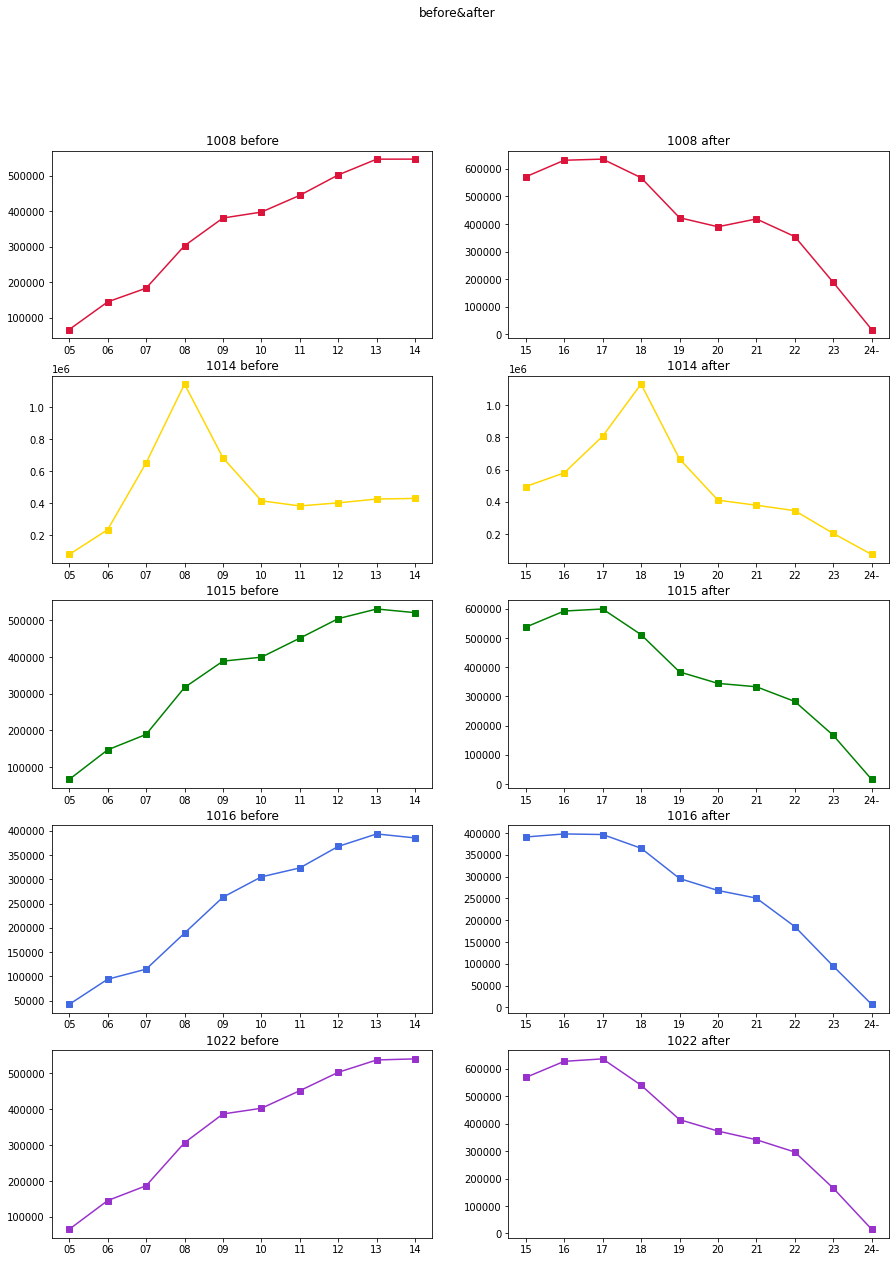

In [8]:
fig, axes = plt.subplots(5, 2, figsize = (15, 20)) 
axes[0,0].plot(before_1008.columns, before_1008.sum(), marker = 's', color = 'crimson', label = '1008 before')
axes[0,1].plot(after_1008.columns, after_1008.sum(), marker = 's', color = 'crimson', label = '1008 after')
axes[1,0].plot(before_1014.columns, before_1014.sum(), marker = 's', color = 'gold', label = '1014 before')
axes[1,1].plot(after_1014.columns, after_1014.sum(), marker = 's', color = 'gold', label = '1014 after')
axes[2,0].plot(before_1015.columns, before_1015.sum(), marker = 's', color = 'green', label = '1015 before')
axes[2,1].plot(after_1015.columns, after_1015.sum(), marker = 's', color = 'green', label = '1015 after')
axes[3,0].plot(before_1016.columns, before_1016.sum(), marker = 's', color = 'royalblue', label = '1016 before')
axes[3,1].plot(after_1016.columns, after_1016.sum(), marker = 's', color = 'royalblue', label = '1016 after')
axes[4,0].plot(before_1022.columns, before_1022.sum(), marker = 's', color = 'darkorchid', label = '1022 before')
axes[4,1].plot(after_1022.columns, after_1022.sum(), marker = 's', color = 'darkorchid', label = '1022 after')

fig.suptitle('before&after')
axes[0,0].set_title('1008 before')
axes[0,1].set_title('1008 after')
axes[1,0].set_title('1014 before')
axes[1,1].set_title('1014 after')
axes[2,0].set_title('1015 before')
axes[2,1].set_title('1015 after')
axes[3,0].set_title('1016 before')
axes[3,1].set_title('1016 after')
axes[4,0].set_title('1022 before')
axes[4,1].set_title('1022 after')
plt.show()

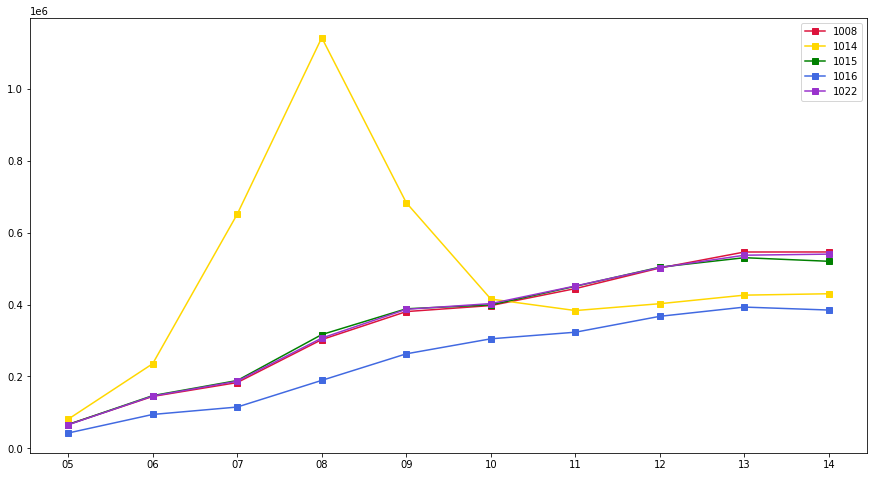

In [9]:
plt.figure(figsize = (15, 8))
plt.plot(before_1008.columns, before_1008.sum(), marker = 's', color = 'crimson', label = '1008')
plt.plot(before_1014.columns, before_1014.sum(), marker = 's', color = 'gold', label = '1014')
plt.plot(before_1015.columns, before_1015.sum(), marker = 's', color = 'green', label = '1015')
plt.plot(before_1016.columns, before_1016.sum(), marker = 's', color = 'royalblue', label = '1016')
plt.plot(before_1022.columns, before_1022.sum(), marker = 's', color = 'darkorchid', label = '1022')
plt.legend()
plt.show()

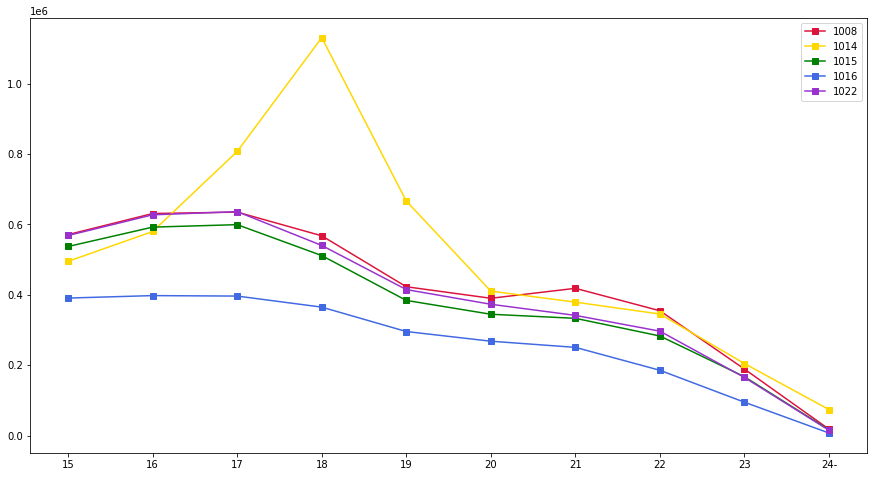

In [10]:
plt.figure(figsize = (15, 8))
plt.plot(after_1008.columns, after_1008.sum(), marker = 's', color = 'crimson', label = '1008')
plt.plot(after_1014.columns, after_1014.sum(), marker = 's', color = 'gold', label = '1014')
plt.plot(after_1015.columns, after_1015.sum(), marker = 's', color = 'green', label = '1015')
plt.plot(after_1016.columns, after_1016.sum(), marker = 's', color = 'royalblue', label = '1016')
plt.plot(after_1022.columns, after_1022.sum(), marker = 's', color = 'darkorchid', label = '1022')
plt.legend()
plt.show()